## 3D Plots, in Python



We first load in the toolboxes for numerical python and plotting.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Plotting a simple surface.

Let's plot the hyperbola $z = x^2 - y^2$. 

The 3D plotting commands expect arrays as entries, so we create a mesh grid from linear variables $x$ and $y$, resulting in arrays $X$ and $Y$. We then compute $Z$ as a grid (array). 

In [11]:
# Make data
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2

I don't know how to simply plot in matplotlib.

Instead, we have three steps
- create a figure
- indicated that the figure will be in 3D
- then send the plot_surface command to the figure asix. 

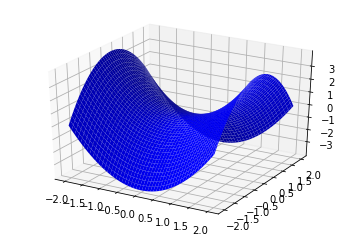

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, color='b')

### Wireframe plots

Use the wireframe command. Note we can adjust the separation between lines, using the stride paameters. 

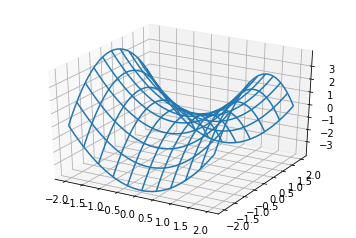

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

### Subplots

To make two plots, side-by-side, you make one figure and add two subplots. (I'm reusing the object label "ax" in the code here.)

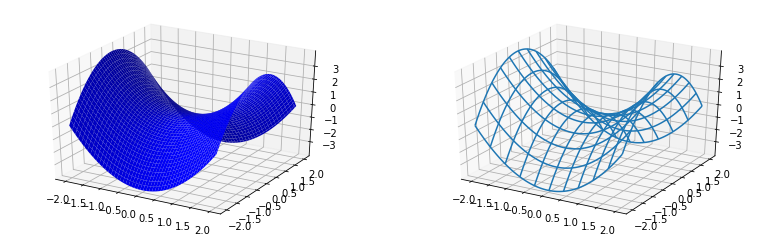

In [25]:
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, color='b')
ax = fig.add_subplot(122, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

### Parameterized surfaces

A parameterized surfaces expresses the spatial variable $x,y,z$ as a function of two independent parameters, say $u$ and $v$. 

Here we plot a sphere. Use the usual spherical coordinates.

$$x = \cos(u)\sin(v) $$
$$y = \sin(u)\sin(v) $$
$$z = \cos(v) $$

with appropriate ranges for $u$ and $v$. We set up the array variables as follows:

In [41]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
U,V = np.meshgrid(u,v)
X = np.cos(U) * np.sin(V)
Y = np.sin(U) * np.sin(V)
Z = np.cos(V)


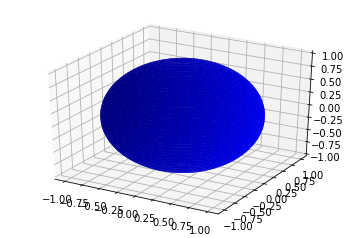

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the surface
ax.plot_surface(X, Y, Z, color='b')

### Outer product for speed

Python provides an outer product, which makes it easy to multiply the $u$ vector by the $v$ vectors, to create the 2D array of grid values. This is sometime useful for speed, so you may see it in other's people's code when they really need the speed. Here is an example.

In [38]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
X = np.outer(np.cos(u), np.sin(v))
Y = np.outer(np.sin(u), np.sin(v))
Z = np.outer(np.ones(np.size(u)), np.cos(v))

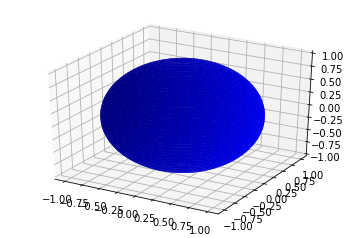

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the surface
ax.plot_surface(X, Y, Z, color='b')

### A donut

Let's plot a torus. The idea is to start with a circle
$$ x_0 = \cos(u) $$
$$ y_0 = \sin(u) $$
$$ z_0 = 0$$
then add a little circle perpendicular to it
$$ (x_0,y_0,0)\cos(v) + (0,0,1)\sin(v) = (\cos(u)\cos(v), \sin(u)\cos(v), \sin(v)).$$
Add them, with a scaling. 

In [51]:
# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)
U,V = np.meshgrid(u,v)
R = 10
r = 4
X = R * np.cos(U) + r*np.cos(U)*np.cos(V)
Y = R * np.sin(U) + r*np.sin(U)*np.cos(V)
Z = r * np.sin(V)


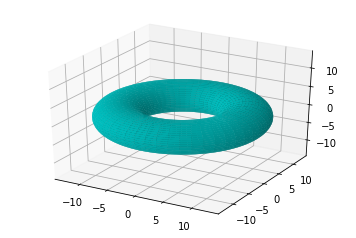

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim([-(R+r), (R+r)])
ax.set_ylim([-(R+r), (R+r)])
ax.set_zlim([-(R+r), (R+r)])
ax.plot_surface(X, Y, Z, color='c')